In [61]:
%reload_ext autoreload
%autoreload 2

In [129]:
# Data Manip
import numpy as np
import pandas as pd

# Dataviz
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# sklearn metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error
from sklearn.metrics.pairwise import euclidean_distances

# dimension reduction
from sklearn.decomposition import PCA


## 1. Chargement du dataset et preparation des données pour ML

### 1.1 Chargement du dataset

In [63]:
shp = pd.read_csv("../transformed\student_habits_performance.csv")
shp.head()

,id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [64]:
shp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             1000 non-null   int64  
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       1000 non-null   object 
 12  internet_quality               1000 non-null   ob

### 1.2 Data Manipulation pour les variables catégorielles

In [65]:
shpml = pd.get_dummies(shp)
shpml.columns

Index(['id', 'age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating', 'exam_score',
       'gender_Female', 'gender_Male', 'gender_Other', 'part_time_job_No',
       'part_time_job_Yes', 'diet_quality_Fair', 'diet_quality_Good',
       'diet_quality_Poor', 'parental_education_level_Bachelor',
       'parental_education_level_High School',
       'parental_education_level_Master', 'parental_education_level_Unknown',
       'internet_quality_Average', 'internet_quality_Good',
       'internet_quality_Poor', 'extracurricular_participation_No',
       'extracurricular_participation_Yes'],
      dtype='object')

In [66]:
y = shpml.exam_score
X = shpml.drop(columns = ["id", "exam_score"])
X.columns

Index(['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
       'attendance_percentage', 'sleep_hours', 'exercise_frequency',
       'mental_health_rating', 'gender_Female', 'gender_Male', 'gender_Other',
       'part_time_job_No', 'part_time_job_Yes', 'diet_quality_Fair',
       'diet_quality_Good', 'diet_quality_Poor',
       'parental_education_level_Bachelor',
       'parental_education_level_High School',
       'parental_education_level_Master', 'parental_education_level_Unknown',
       'internet_quality_Average', 'internet_quality_Good',
       'internet_quality_Poor', 'extracurricular_participation_No',
       'extracurricular_participation_Yes'],
      dtype='object')

## 2. Modèles de regression linéaire

### 2.1 Regression linéaire classique

In [67]:
reg_lin = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [68]:
reg_lin.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [69]:
y_pred = reg_lin.predict(X_test)

In [70]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse)

MAE: 4.189311054627606 ; MSE: 26.476236454969193 ; RMSE: 5.14550643328421


In [71]:
reg_lin.score(X_test, y_test)

0.89675026403802

##### Le coeff de détermination est de 0.9, et donc semble plutôt bon avec ce modèle basique de régression linéaire
Nous allons maintenant investiguer les différentes valeurs des paramètres de la régression pour les différentes variables

In [72]:
for i in range(len(reg_lin.coef_)):

    print("Feature:", X.columns[i], ";", "coeff:", reg_lin.coef_[i])


Feature: age ; coeff: 0.052380081594701026
Feature: study_hours_per_day ; coeff: 9.531532014587434
Feature: social_media_hours ; coeff: -2.6850044855290873
Feature: netflix_hours ; coeff: -2.3215307151083535
Feature: attendance_percentage ; coeff: 0.1445076942016557
Feature: sleep_hours ; coeff: 1.9764071904681215
Feature: exercise_frequency ; coeff: 1.3196459241560452
Feature: mental_health_rating ; coeff: 1.9528562272570462
Feature: gender_Female ; coeff: -0.31500178615494856
Feature: gender_Male ; coeff: -0.18070542270967027
Feature: gender_Other ; coeff: 0.495707208864619
Feature: part_time_job_No ; coeff: -0.18546060417818414
Feature: part_time_job_Yes ; coeff: 0.1854606041781843
Feature: diet_quality_Fair ; coeff: 0.5015559802492435
Feature: diet_quality_Good ; coeff: -0.4567995977523904
Feature: diet_quality_Poor ; coeff: -0.04475638249685253
Feature: parental_education_level_Bachelor ; coeff: 0.49768560499329134
Feature: parental_education_level_High School ; coeff: 0.045154436

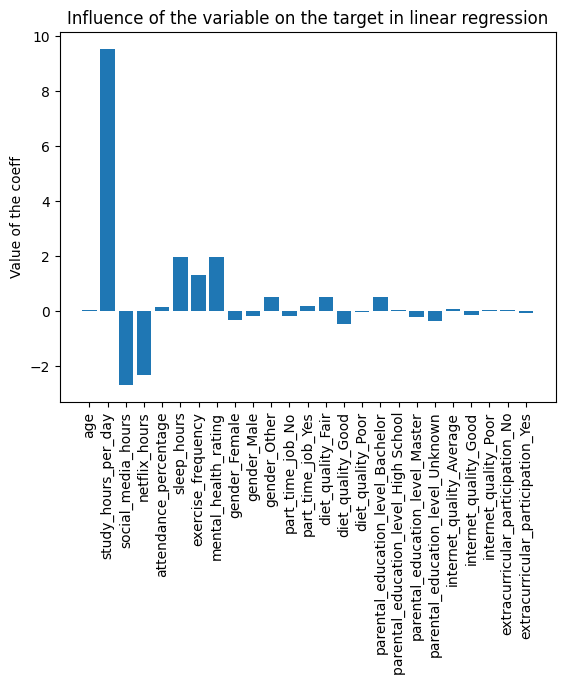

In [73]:
plt.bar(X.columns, reg_lin.coef_)
plt.xticks(rotation=90)
plt.ylabel("Value of the coeff")
plt.title("Influence of the variable on the target in linear regression")
plt.show()

In [74]:
total_abs_coeff = sum(abs(reg_lin.coef_))
print(total_abs_coeff)

feature_coeff = []
for i in range(len(reg_lin.coef_)):
    feature_coeff.append({'feature' : X.columns[i], "coeff" : abs(reg_lin.coef_[i])/total_abs_coeff})

print(feature_coeff)

def select_coeff(x):
    return x["coeff"]
print(select_coeff(feature_coeff[1]))
print(sorted(feature_coeff, reverse=True, key=select_coeff))
feature_coeff_sorted = sorted(feature_coeff, reverse=True, key=select_coeff)



23.824337127098143
[{'feature': 'age', 'coeff': np.float64(0.002198595550225117)}, {'feature': 'study_hours_per_day', 'coeff': np.float64(0.40007543394548983)}, {'feature': 'social_media_hours', 'coeff': np.float64(0.11270007099064783)}, {'feature': 'netflix_hours', 'coeff': np.float64(0.09744366454871103)}, {'feature': 'attendance_percentage', 'coeff': np.float64(0.00606554941825813)}, {'feature': 'sleep_hours', 'coeff': np.float64(0.0829574892230738)}, {'feature': 'exercise_frequency', 'coeff': np.float64(0.05539066699383888)}, {'feature': 'mental_health_rating', 'coeff': np.float64(0.08196896378853871)}, {'feature': 'gender_Female', 'coeff': np.float64(0.013221848921733944)}, {'feature': 'gender_Male', 'coeff': np.float64(0.0075849087320097285)}, {'feature': 'gender_Other', 'coeff': np.float64(0.02080675765374368)}, {'feature': 'part_time_job_No', 'coeff': np.float64(0.007784502174763073)}, {'feature': 'part_time_job_Yes', 'coeff': np.float64(0.00778450217476308)}, {'feature': 'diet

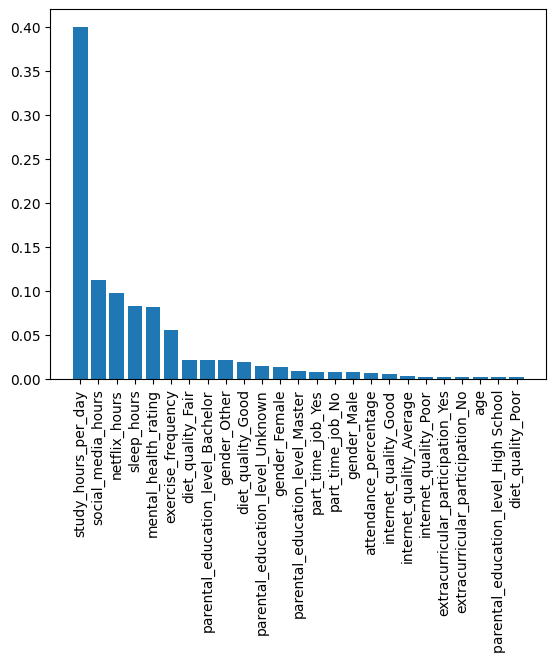

In [75]:
feature = []
coeff = []
for i in range(len(feature_coeff_sorted)):
    feature.append(feature_coeff_sorted[i]['feature'])
    coeff.append(feature_coeff_sorted[i]['coeff'])

plt.bar(feature, coeff)
plt.xticks(rotation=90)
plt.show()

### 2.2 Modèle de régeression Ridge

In [76]:
reg_ridge = Ridge()

In [77]:
reg_ridge.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [78]:
y_pred = reg_ridge.predict(X_test)

In [79]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse)

MAE: 4.18916436642335 ; MSE: 26.477325348577303 ; RMSE: 5.145612242345638


In [80]:
reg_ridge.score(X_test, y_test)

0.8967460176649482

23.77923052063994


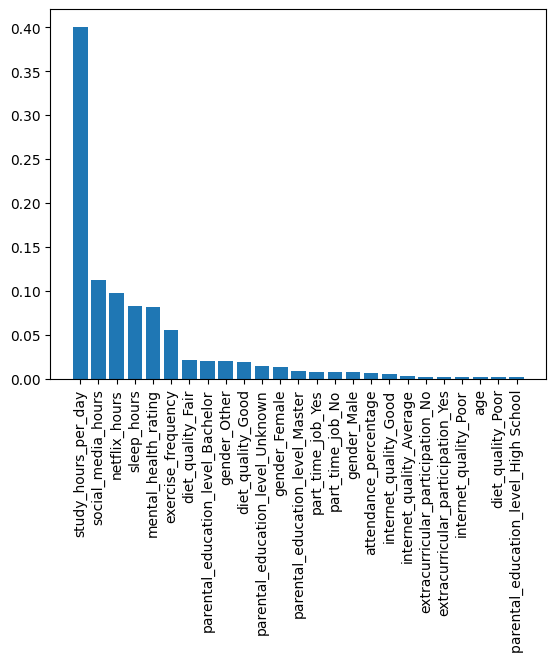

In [81]:
total_abs_coeff = sum(abs(reg_ridge.coef_))
print(total_abs_coeff)

feature_coeff = []
for i in range(len(reg_ridge.coef_)):
    feature_coeff.append({'feature' : X.columns[i], "coeff" : abs(reg_ridge.coef_[i])/total_abs_coeff})


def select_coeff(x):
    return x["coeff"]
feature_coeff_sorted = sorted(feature_coeff, reverse=True, key=select_coeff)

feature = []
coeff = []
for i in range(len(feature_coeff_sorted)):
    feature.append(feature_coeff_sorted[i]['feature'])
    coeff.append(feature_coeff_sorted[i]['coeff'])

plt.bar(feature, coeff)
plt.xticks(rotation=90)
plt.show()

### 2.3 Modèle de régression Lasso

In [82]:
reg_lasso = Lasso()

In [83]:
reg_lasso.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,None
,selection,'cyclic'


In [84]:
y_pred = reg_lasso.predict(X_test)

In [85]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse)

MAE: 4.3125449078326 ; MSE: 28.799896023827777 ; RMSE: 5.366553458582871


In [86]:
reg_lasso.score(X_test, y_test)

0.8876886575155739

16.97511506313964


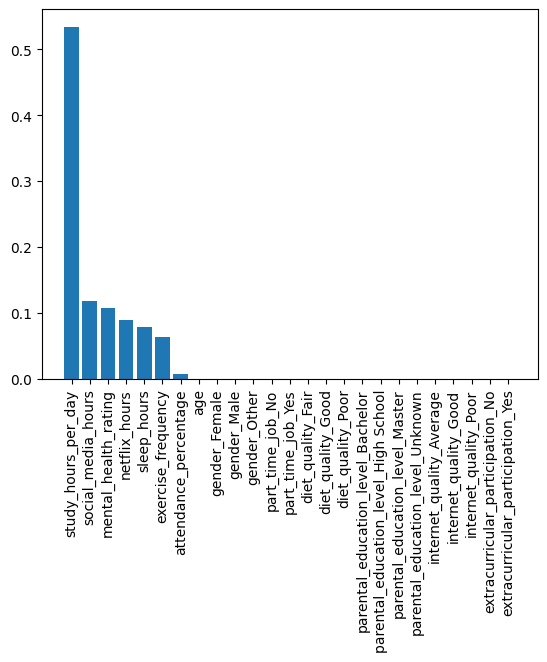

In [87]:
total_abs_coeff = sum(abs(reg_lasso.coef_))
print(total_abs_coeff)

feature_coeff = []
for i in range(len(reg_lasso.coef_)):
    feature_coeff.append({'feature' : X.columns[i], "coeff" : abs(reg_lasso.coef_[i])/total_abs_coeff})


def select_coeff(x):
    return x["coeff"]
feature_coeff_sorted = sorted(feature_coeff, reverse=True, key=select_coeff)

feature = []
coeff = []
for i in range(len(feature_coeff_sorted)):
    feature.append(feature_coeff_sorted[i]['feature'])
    coeff.append(feature_coeff_sorted[i]['coeff'])

plt.bar(feature, coeff)
plt.xticks(rotation=90)
plt.show()

## 3. Random Forest Regressor

### 3.1 Randorm Forest Regressor with 6 most significant features given by the 3 linear regressors

In [88]:
shpml.columns

Index(['id', 'age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating', 'exam_score',
       'gender_Female', 'gender_Male', 'gender_Other', 'part_time_job_No',
       'part_time_job_Yes', 'diet_quality_Fair', 'diet_quality_Good',
       'diet_quality_Poor', 'parental_education_level_Bachelor',
       'parental_education_level_High School',
       'parental_education_level_Master', 'parental_education_level_Unknown',
       'internet_quality_Average', 'internet_quality_Good',
       'internet_quality_Poor', 'extracurricular_participation_No',
       'extracurricular_participation_Yes'],
      dtype='object')

In [89]:
features = ['study_hours_per_day', 'social_media_hours', 'netflix_hours', 
            'sleep_hours', 'exercise_frequency', 'mental_health_rating', 'exam_score']

In [90]:
shpshort = shpml[features]
X = shpshort.drop(columns=['exam_score'])
y= shpshort['exam_score']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [91]:
rfr = RandomForestRegressor()

In [92]:
rfr.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [93]:
y_pred = rfr.predict(X_test)

In [94]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse)

MAE: 4.857014999999999 ; MSE: 36.511515225 ; RMSE: 6.042475918446014


In [95]:
rfr.score(X_test, y_test)

0.8576155522343689

### 3.2 Random Forest Regressor with full dataset

In [96]:
y = shpml.exam_score
X = shpml.drop(columns = ["id", "exam_score"])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [97]:
rfr.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [98]:
y_pred = rfr.predict(X_test)

In [99]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse)

MAE: 5.001760000000001 ; MSE: 39.270359910000025 ; RMSE: 6.266606730121176


In [100]:
rfr.score(X_test, y_test)

0.846856848452174

##### La présélection des variables apparues comme les plus pertinentes lors des régressions linéaires a permis d'améliorer la performance de la régression par Random Forest

## 4. Utilisation d'un scaler

Nous allons essayer d'améliorer nos résultats avec des scalers
Comme ces variables sont à peu près du même ordre de grandeur, nous ne nous attendons pas à des progrès exceptionnels. 
De même nous pensons a priori que comme les modèles plus complexes sont en général moins sensibles à la réduction de dimension, la rendom forest devrait être moins impactée.
Nous allons séparer variables catégorielles et numériques du dataset pour n'opérer la pca que sur ces dernières.

In [101]:
stdscl = StandardScaler()

In [102]:
X_sc_train = stdscl.fit_transform(X_train)

In [103]:
X_sc_test = stdscl.transform(X_test)

### 4.1 Scaler avec la régression classique

In [104]:
reg_lin.fit(X_sc_train, y_train)
y_sc_pred = reg_lin.predict(X_sc_test)

mae = mean_absolute_error(y_test, y_sc_pred)
mse = mean_squared_error(y_test, y_sc_pred)
rmse = root_mean_squared_error(y_test, y_sc_pred)
score = reg_lin.score(X_sc_test, y_test)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse, "R2:", score)

MAE: 4.1893110546275985 ; MSE: 26.476236454969175 ; RMSE: 5.145506433284209 R2: 0.8967502640380202


Ce score de 0.878 est inférieur de plus de 2 centièmes à celui que nous avions sans scaler: 0.896
Essayons quand même avec le random forest regressor

### 4.2 Scaler avec la régression par random forest

In [105]:
rfr.fit(X_sc_train, y_train)
y_sc_pred = rfr.predict(X_sc_test)

mae = mean_absolute_error(y_test, y_sc_pred)
mse = mean_squared_error(y_test, y_sc_pred)
rmse = root_mean_squared_error(y_test, y_sc_pred)
score = reg_lin.score(X_sc_test, y_test)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse, "R2:", score)

MAE: 4.960890000000002 ; MSE: 39.08424255000002 ; RMSE: 6.251739162025237 R2: 0.8967502640380202


Contrairement à nos attentes, le score de détermination de la random forest regression avec standard scaler est supérieur de 2 centièmes au score obtenu sans standard scaler.

## 5. Utilisation de réduction dimensionnelle, PCA

Nous allons utiliser la PCA sur le dataset pour la régression linéaire classique et le régresseur par random forest. 

In [106]:
shpml.columns

Index(['id', 'age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating', 'exam_score',
       'gender_Female', 'gender_Male', 'gender_Other', 'part_time_job_No',
       'part_time_job_Yes', 'diet_quality_Fair', 'diet_quality_Good',
       'diet_quality_Poor', 'parental_education_level_Bachelor',
       'parental_education_level_High School',
       'parental_education_level_Master', 'parental_education_level_Unknown',
       'internet_quality_Average', 'internet_quality_Good',
       'internet_quality_Poor', 'extracurricular_participation_No',
       'extracurricular_participation_Yes'],
      dtype='object')

In [107]:
num_feat = ['age', 'study_hours_per_day', 'social_media_hours',
       'netflix_hours', 'attendance_percentage', 'sleep_hours',
       'exercise_frequency', 'mental_health_rating', 'exam_score']

shpml_short = shpml.drop(columns=['id'])
shpml_num = shpml_short[num_feat]
shpml_cat = shpml_short.drop(columns=num_feat)

In [108]:
pca = PCA(n_components=6, random_state=137)

In [109]:
y = shpml_num.exam_score
X = shpml_num.drop(columns = ["exam_score"])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=137)

In [110]:
X_pca_train = pca.fit_transform(X_train)
pca.explained_variance_

array([88.05012988,  8.24760063,  5.29660456,  4.10651893,  2.24291786,
        1.49061233])

### 4.1 Détermination du nombre optimal de composantes avec la méthode de la variance cumulée, erreur sur l'interprétation :  à refaire

Text(0.5, 1.0, 'PCA explained variance as function of components number')

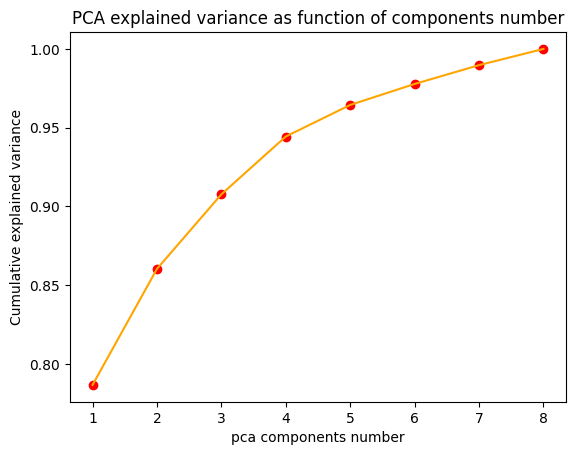

In [111]:
pca = PCA(n_components=len(X.columns), random_state=137)
pca.fit(X_train)

xdata = np.asarray(range(1,len(X.columns)+1))

ydata =  np.cumsum(pca.explained_variance_)/np.sum(pca.explained_variance_)

plt.plot(xdata, ydata, '-', color = "orange")
plt.scatter(xdata, ydata, color = "red")
plt.xlabel("pca components number")
plt.ylabel("Cumulative explained variance")
plt.title ("PCA explained variance as function of components number")

Nous allons sélectionner 4 composantes principales pour garder 95% de la variance expliquée

In [112]:
pca = PCA(4, random_state=137)
pca.fit(X_train)
pca.components_

array([[-0.00698276,  0.00472316,  0.00358581, -0.00116764,  0.99992569,
         0.00195382,  0.00132685, -0.00759911],
       [-0.10630419,  0.01641082, -0.00196659,  0.00320733,  0.0067072 ,
        -0.00872706,  0.03793642,  0.99340607],
       [ 0.99130732,  0.01743735,  0.00519444,  0.00460814,  0.00745721,
         0.02865683,  0.07372983,  0.10317274],
       [-0.06958165, -0.0388584 , -0.03763724, -0.01177064, -0.00191994,
         0.04196248,  0.99416059, -0.04442413]])

In [113]:
comp1 = pca.components_[0]
total_comp1 = np.sqrt(np.sum(np.power(comp1, 2)))
print(total_comp1)


0.9999999999999997


In [114]:
for i in range(len(X_train.columns)):

    print(X_train.columns[i], ":", comp1[i])

age : -0.006982760858449547
study_hours_per_day : 0.004723155088147579
social_media_hours : 0.0035858106789691674
netflix_hours : -0.0011676415128744032
attendance_percentage : 0.9999256907614057
sleep_hours : 0.001953818359001519
exercise_frequency : 0.0013268500299591368
mental_health_rating : -0.007599108501796792


In [115]:
for i in range(4):
    comp = pca.components_[i]
    max_feat_pos = np.argmax(comp)
    print(X_train.columns[max_feat_pos], ':', np.max(comp))

attendance_percentage : 0.9999256907614057
mental_health_rating : 0.9934060748529172
age : 0.9913073168352566
exercise_frequency : 0.9941605860201255


### 4.2 Détermination du meilleur choix du nombre de composantes avec la méthode du coude

In [116]:
pca = PCA(random_state=137)
pca.fit(X_train)

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,137


Text(0.5, 1.0, 'PCA explained variance as function of components number')

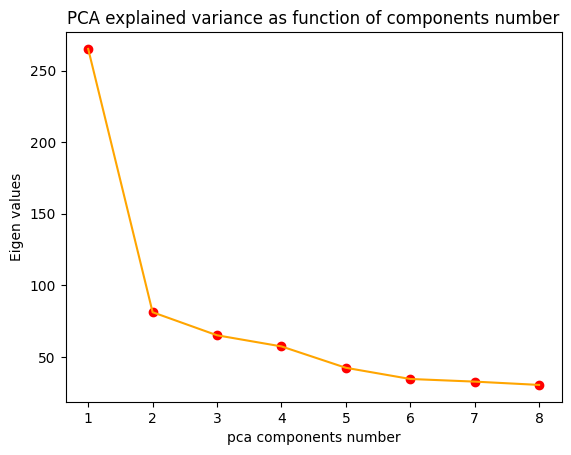

In [117]:
xdata = np.asarray(range(1,len(X.columns)+1))

ydata =  pca.singular_values_

plt.plot(xdata, ydata, '-', color = "orange")
plt.scatter(xdata, ydata, color = "red")
plt.xlabel("pca components number")
plt.ylabel("Eigen values")
plt.title ("PCA explained variance as function of components number")

La méthode du coude confirme le résultat précédent, ie un nombre de composants égal à 2 devrait être le bon choix.

#### 4.1.1 Tracé du cercle de corrélation de la PCA

In [118]:
X_std_train = stdscl.fit_transform(X_train)
pca = PCA(n_components=2, random_state=137)
X_pca_train = pca.fit_transform(X_std_train)

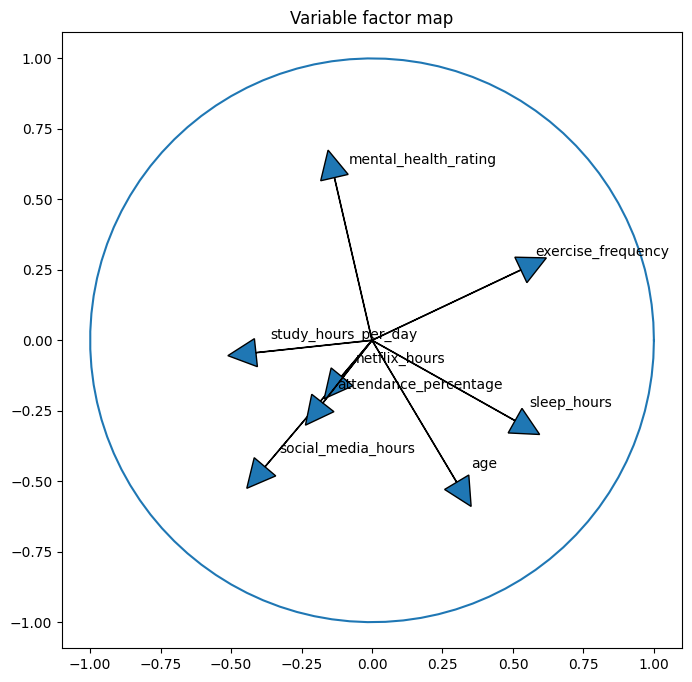

In [119]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             X_train.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

### 4.3 Essai de la pca suivie de la régression linéaire

In [120]:
pca = PCA(n_components=2,random_state=137)
X_pca_train = pca.fit_transform(X_train)

In [121]:
X_pca_test = pca.transform(X_test)

on ne refait pas avec les données de test sinon ce serait introduire des données sur le test set dans la pca, et donc fausser les prédictions

In [122]:
reg_lin.fit(X_pca_train, y_train)
y_pca_pred = reg_lin.predict(X_pca_test)

mae = mean_absolute_error(y_test, y_pca_pred)
mse = mean_squared_error(y_test, y_pca_pred)
rmse = root_mean_squared_error(y_test, y_pca_pred)
score = reg_lin.score(X_pca_test, y_test)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse, "R2:", score)

MAE: 12.206099897607098 ; MSE: 241.540068849516 ; RMSE: 15.541559408550867 R2: 0.000848026171718308


Les résultats sont très mauvais, il y a très probablement une erreur dans notre démarche. Toutefois l'article https://stackoverflow.com/questions/55441022/how-to-aply-the-same-pca-to-train-and-test-set semble valider notre démarche.

#### Essai à partir du set après std scaler, ce qui permet de normaliser la variance et donc de mieux choisir nos directions maximisant la variance.

In [123]:
pca = PCA(n_components=2,random_state=137)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)

reg_lin.fit(X_pca_train, y_train)
y_pca_pred = reg_lin.predict(X_pca_test)

mae = mean_absolute_error(y_test, y_pca_pred)
mse = mean_squared_error(y_test, y_pca_pred)
rmse = root_mean_squared_error(y_test, y_pca_pred)
score = reg_lin.score(X_pca_test, y_test)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse, "R2:", score)

MAE: 12.230169581758261 ; MSE: 242.7640567034875 ; RMSE: 15.580887545434871 R2: -0.004215108429768577


Pas d'amélioration du résultat

### 4.3 Essai de la pca suivie du rfr

In [124]:
pca = PCA(n_components=2,random_state=137)
X_pca_train = pca.fit_transform(X_train)
X_pca_test = pca.transform(X_test)

rfr.fit(X_pca_train, y_train)
y_pca_pred = rfr.predict(X_pca_test)

mae = mean_absolute_error(y_test, y_pca_pred)
mse = mean_squared_error(y_test, y_pca_pred)
rmse = root_mean_squared_error(y_test, y_pca_pred)
score = rfr.score(X_pca_test, y_test)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse, "R2:", score)

MAE: 13.397874999999999 ; MSE: 283.685866765 ; RMSE: 16.842976778616066 R2: -0.17349181473500552


In [125]:
pca = PCA(n_components=2,random_state=137)
X_pca_train = pca.fit_transform(X_sc_train)
X_pca_test = pca.transform(X_sc_test)

rfr.fit(X_pca_train, y_train)
y_pca_pred = rfr.predict(X_pca_test)

mae = mean_absolute_error(y_test, y_pca_pred)
mse = mean_squared_error(y_test, y_pca_pred)
rmse = root_mean_squared_error(y_test, y_pca_pred)
score = rfr.score(X_pca_test, y_test)

print("MAE:", mae, ";", "MSE:", mse, ";", "RMSE:", rmse, "R2:", score)

MAE: 13.726090000000001 ; MSE: 292.26835975999995 ; RMSE: 17.09585797086534 R2: -0.20899406020991318


Que ce soit avec ou sans std scaler le résultat est aussi mauvais que pour la régression linéaire.

## 5. Utilisation de gridsearchcv avec le random forest regressor

In [139]:
param_grid = {'n_estimators':(25, 100), 'max_depth':(5, 10, 15), 'criterion':["squared_error", "absolute_error"]}
cv = 5
scoring = ("r2", "neg_mean_absolute_error", "neg_root_mean_squared_error")
refit = "r2"

In [141]:
rfr = RandomForestRegressor(random_state=137, n_jobs=-1)

In [142]:
grid_rfr = GridSearchCV(rfr, param_grid, scoring=scoring, refit = refit, n_jobs=-1)

In [143]:
grid_rfr.fit(X, y)

,estimator,RandomForestR...dom_state=137)
,param_grid,"{'criterion': ['squared_error', 'absolute_error'], 'max_depth': (5, ...), 'n_estimators': (25, ...)}"
,scoring,"('r2', ...)"
,n_jobs,-1
,refit,'r2'
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,100


In [147]:
rfr_results = pd.DataFrame(grid_rfr.cv_results_)
rfr_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_r2,split1_test_r2,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_root_mean_squared_error,split1_test_neg_root_mean_squared_error,split2_test_neg_root_mean_squared_error,split3_test_neg_root_mean_squared_error,split4_test_neg_root_mean_squared_error,mean_test_neg_root_mean_squared_error,std_test_neg_root_mean_squared_error,rank_test_neg_root_mean_squared_error
0,0.124248,0.021980,0.037464,0.010342,squared_error,5,25,"{'criterion': 'squared_error', 'max_depth': 5,...",0.830273,0.838209,...,0.424597,12,-6.509973,-7.428714,-7.535390,-6.791877,-7.893323,-7.231856,0.506581,12
1,0.499980,0.123111,0.097300,0.042675,squared_error,5,100,"{'criterion': 'squared_error', 'max_depth': 5,...",0.832808,0.838233,...,0.414492,10,-6.461189,-7.428165,-7.383790,-6.703604,-7.825672,-7.160484,0.502344,10
2,0.191369,0.051681,0.070784,0.022085,squared_error,10,25,"{'criterion': 'squared_error', 'max_depth': 10...",0.851383,0.867089,...,0.301320,8,-6.091706,-6.733130,-6.618544,-5.976622,-6.869540,-6.457908,0.356857,8
3,0.728358,0.144562,0.198254,0.133109,squared_error,10,100,"{'criterion': 'squared_error', 'max_depth': 10...",0.856825,0.873164,...,0.289276,1,-5.979128,-6.577443,-6.602148,-5.983477,-6.771616,-6.382762,0.334541,4
4,0.234123,0.057117,0.127547,0.041439,squared_error,15,25,"{'criterion': 'squared_error', 'max_depth': 15...",0.851161,0.868713,...,0.316202,7,-6.096248,-6.691875,-6.661398,-5.958297,-6.881019,-6.457767,0.362100,7
